# [TEMPLATE] DATASET DEPURADO

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn


In [8]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [9]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [10]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [11]:
datos = df.loc[(~df['provincia'].isnull()) & (~df['precio'].isnull())] #Filtrado de entradas invalidas para este analisis

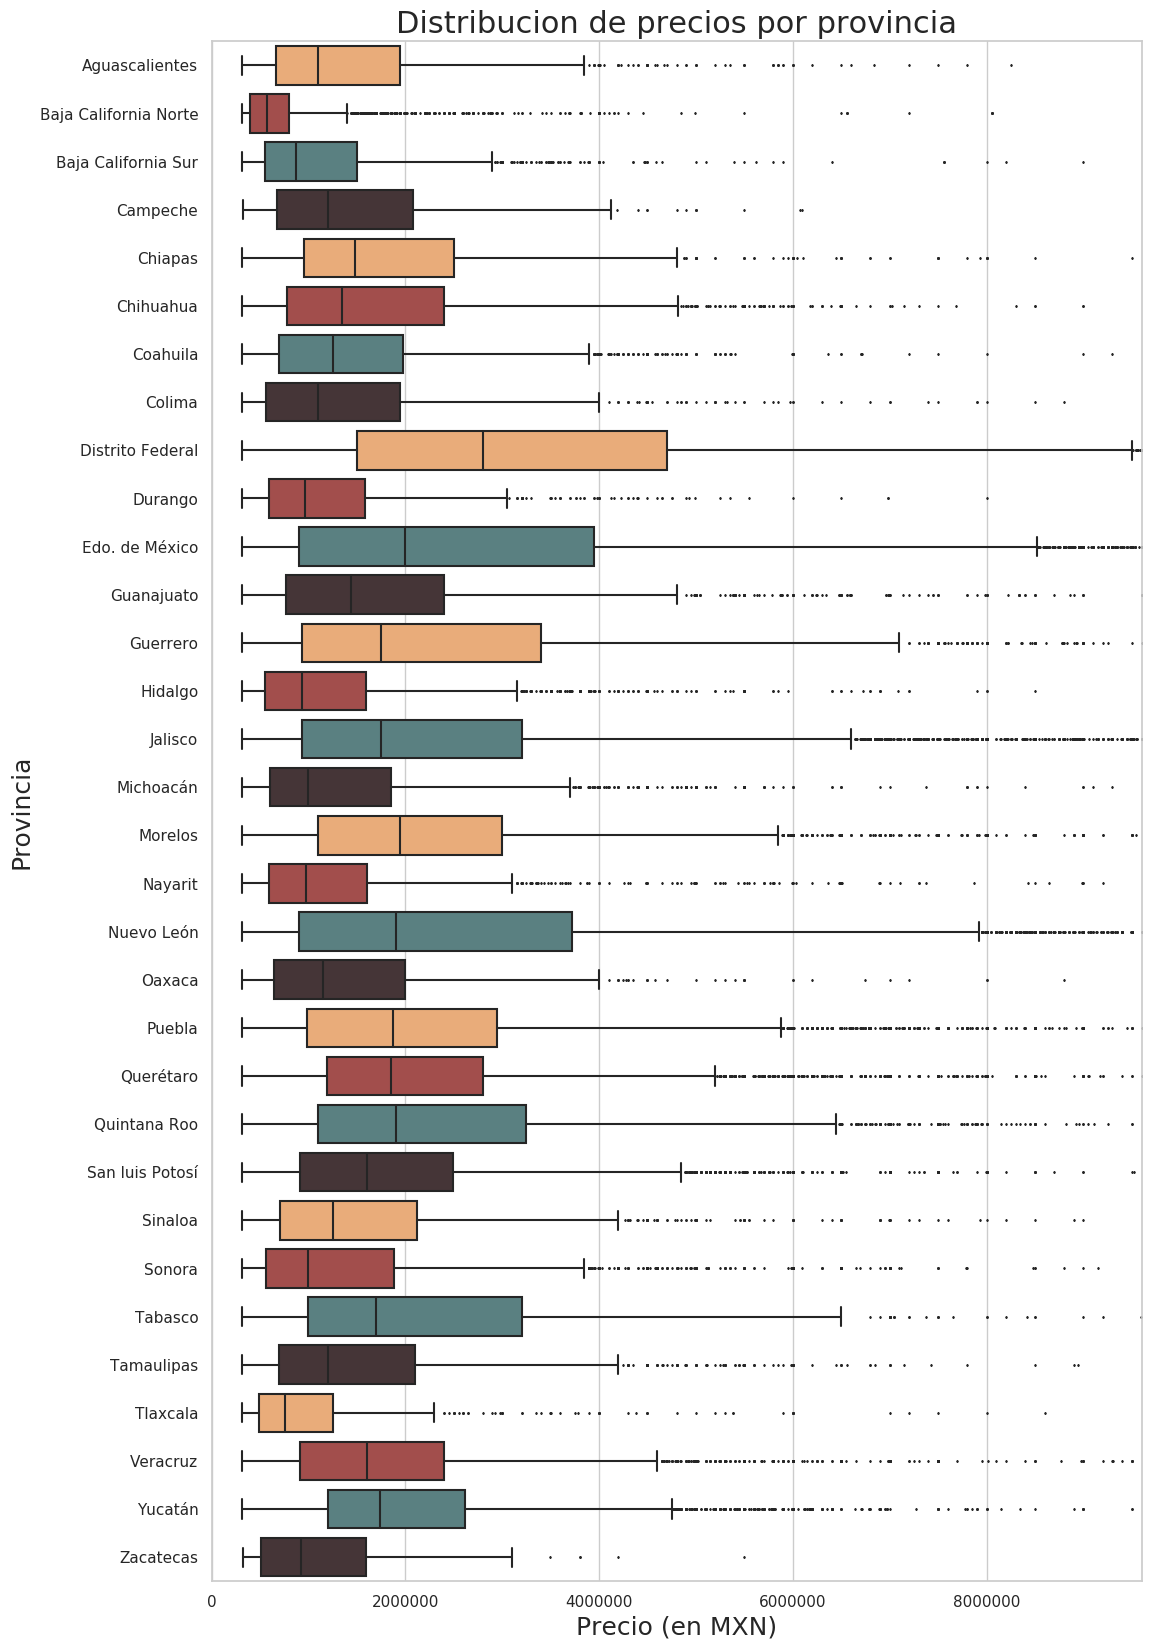

In [16]:
plt.figure(figsize=(12, 20))
plt.ticklabel_format(style='plain')
paleta = sns.color_palette(["#FCAA67","#B0413E","#548687","#473335"])
g = sns.boxplot( y=datos['provincia'], x=datos['precio'],fliersize=1,palette=paleta)
g.set_title("Distribucion de precios por provincia", fontsize=22)
g.set_xlabel("Precio (en MXN)",fontsize=18)
g.set_ylabel("Provincia", fontsize=18)
g.set_xlim((0,9600000))
g.figure.savefig("distribucion de precio por provincia.png",bbox_inches='tight')

## En este plot, quedan algunos outliers fuera del grafico. 